In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

# The TA walked me through assembling this code

In [8]:
# View all of the classes that automap found
Base.classes.keys()

# The TA walked me through assembling this code

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

# The TA walked me through assembling this code

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# The TA walked me through assembling this code

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(func.max(measurement.date)).first()

# The TA walked me through assembling this code

('2017-08-23',)

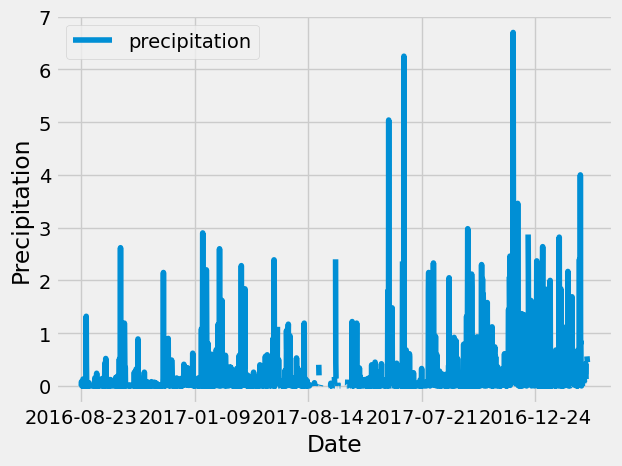

In [70]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
oneyearago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
oneyearago

# Perform a query to retrieve the data and precipitation scores
precipitationdata = session.query(measurement.date,measurement.prcp).filter(measurement.date>=oneyearago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitationdata, columns=['date','precipitation'])

# Sort the dataframe by date
cleaned_data = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date',y='precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()

# The TA walked me through assembling this code

In [71]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

# The TA walked me through assembling this code

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [72]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

# The TA walked me through assembling this code

[(9,)]

In [73]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
# The TA walked me through assembling this code

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [2]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.avg(measurement.tobs),func.max(measurement.tobs)).first()

NameError: name 'session' is not defined

Text(0.5, 4.183333333333314, 'Temperature')

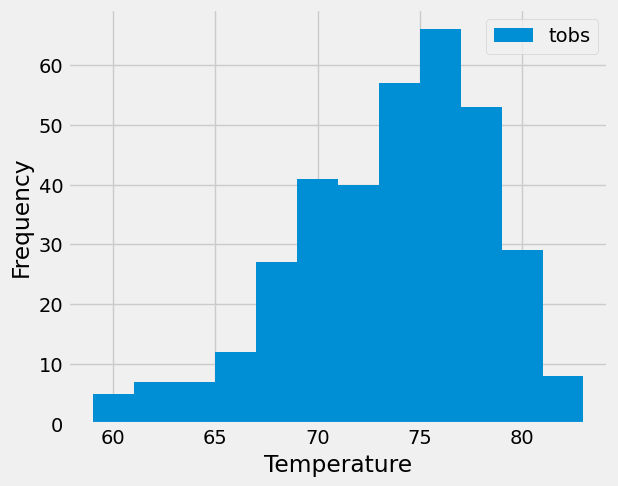

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()